In [10]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataset
kickstarter_data = pd.read_csv("Kickstarter_preprocessed.csv")

In [3]:
#Check what the dataset looks like
kickstarter_data.head(5)

,Unnamed: 0,url,urlProfile,campaignTitle,category,creator,goal,location,totalNumberBackers,numComments,...,endDate,startDate,estimatedDelivery,experience,canceled,averageBackersRequired,aggregatedPerkValue,overPaying,shippingWorld,numCompetitors
0,1,https://www.kickstarter.com/projects/100143389...,https://www.kickstarter.com/profile/1001433890...,Die Kamera,Webseries,Georg Melichar,58367.10,"Vienna, Austria",1,0,...,2017-03-31 14:30:00,2017-03-01 15:30:00,229.177083,1.141667,False,734.177358,0.0,1.06,1.0,26
1,2,https://www.kickstarter.com/projects/100146151...,https://www.kickstarter.com/profile/100146151/...,"""Flores"" Documentary Film",Documentary,Francisco Viveros,6994.52,"Mexico City, Mexico",51,1,...,2017-04-20 00:32:00,2017-02-19 01:32:00,254.523232,73.341667,False,179.346667,802.0,7133.82,1.0,88
2,3,https://www.kickstarter.com/projects/100217190...,https://www.kickstarter.com/profile/1002171905...,F(r)iction #7 - A Fine Art & Literature Collec...,Fiction,Tethered by Letters,3000.00,"Denver, CO",119,5,...,2017-04-22 14:45:00,2017-03-23 14:45:00,16.135417,683.740278,False,75.000000,3473.0,951.00,1.0,64
3,4,https://www.kickstarter.com/projects/100296962...,https://www.kickstarter.com/profile/1002969621...,Design Canada,Graphic Design,Jessica Edwards,80000.00,"Vancouver, Canada",1483,34,...,2017-03-30 22:00:00,2017-02-28 13:09:00,149.690476,2265.436806,False,290.909091,86240.0,12938.00,1.0,23
4,5,https://www.kickstarter.com/projects/100345889...,https://www.kickstarter.com/profile/1003458897...,New HyperKid Book - The Cyborg at the End of t...,Young Adult,Richard Daub & Emerson Daub,10000.00,"White Plains, NY",0,0,...,2017-04-25 11:41:00,2017-03-26 11:41:00,5.513194,9.996528,True,571.428571,0.0,0.00,0.5,13


In [4]:
#list of columns
columns = kickstarter_data.columns.tolist() #column list
columns

['Unnamed: 0',
 'url',
 'urlProfile',
 'campaignTitle',
 'category',
 'creator',
 'goal',
 'location',
 'totalNumberBackers',
 'numComments',
 'numUpdates',
 'totalPledge',
 'backed',
 'comments',
 'created',
 'joinKS',
 'facebookFriends',
 'urlCreator',
 'websites',
 'mainCategory',
 'countryState',
 'city',
 'projectsWeLove',
 'continent',
 'valuta',
 'success',
 'percentageGoal',
 'lowestPerk',
 'highestPerk',
 'medianPerk',
 'lowestPerkPriceOriginal',
 'numPerks',
 'numCollaborators',
 'noFacebookFriends',
 'numSuccessfulCampaigns',
 'numLiveCampaigns',
 'pastSuccessRate',
 'totWordCount',
 'mainVideo',
 'numAdditionalVideos',
 'numImages',
 'viewGallery',
 'addedPerks',
 'duration',
 'endDate',
 'startDate',
 'estimatedDelivery',
 'experience',
 'canceled',
 'averageBackersRequired',
 'aggregatedPerkValue',
 'overPaying',
 'shippingWorld',
 'numCompetitors']

In [5]:
#Filter out unnecessary columns -at launch point
no_need = ["Unnamed: 0","url", "urlProfile", "url", "campaignTitle", "aggregatedPerkValue","creator", "location","totalNumberBackers", "numComments","numUpdates","totalPledge","backed","comments","created","joinKS","urlCreator","websites","countryState","city","projectsWeLove","continent","valuta","lowestPerkPriceOriginal","noFacebookFriends","pastSuccessRate","numAdditionalVideos","viewGallery","addedPerks","endDate","startDate","experience","percentageGoal","numLiveCampaigns","averageBackersRequired","canceled","highestPerk","lowestPerk","overPaying","shippingWorld","numCompetitors"]
kickstarter = kickstarter_data.copy() #kickstarter_data remains the same
kickstarter.drop(no_need, axis=1, inplace=True)
kickstarter.head(10)

,category,goal,facebookFriends,mainCategory,success,medianPerk,numPerks,numCollaborators,numSuccessfulCampaigns,totWordCount,mainVideo,numImages,duration,estimatedDelivery
0,Webseries,58367.10,737.0,Film & Video,0,79.5,4,0,0,253,1,0,29.958333,229.177083
1,Documentary,6994.52,2480.0,Film & Video,1,39.0,11,0,1,1165,1,7,59.958333,254.523232
2,Fiction,3000.00,461.0,Publishing,1,40.0,20,0,4,1371,1,12,30.000000,16.135417
3,Graphic Design,80000.00,574.5,Design,1,275.0,28,0,2,1040,1,34,30.368715,149.690476
4,Young Adult,10000.00,574.5,Publishing,0,17.5,6,0,0,1641,1,0,30.000000,5.513194
5,Digital Art,385.91,574.5,Art,0,13.5,8,0,0,158,0,4,31.000000,15.492361
6,Documentary,3500.00,702.0,Film & Video,1,300.0,9,0,1,897,1,0,21.628322,135.277778
7,Food,10000.00,4981.0,Food,0,100.0,1,0,0,197,1,0,59.958333,-20.712500
8,Art,2253.30,270.0,Art,1,26.0,3,0,1,305,1,0,12.559942,-1.666667
9,Sculpture,81289.00,5000.0,Art,0,125.0,6,0,0,289,0,0,30.000000,226.521528


In [6]:
kc_film_video = kickstarter[kickstarter["mainCategory"]=="Film & Video"].copy()
kc_publishing = kickstarter[kickstarter["mainCategory"]=="Publishing"].copy()
kc_design = kickstarter[kickstarter["mainCategory"]=="Design"].copy()
kc_art = kickstarter[kickstarter["mainCategory"]=="Art"].copy()
kc_food = kickstarter[kickstarter["mainCategory"]=="Food"].copy()
kc_fashion = kickstarter[kickstarter["mainCategory"]=="Fashion"].copy()
kc_games = kickstarter[kickstarter["mainCategory"]=="Games"].copy()
kc_theater = kickstarter[kickstarter["mainCategory"]=="Theater"].copy()
kc_music = kickstarter[kickstarter["mainCategory"]=="Music"].copy()
kc_crafts = kickstarter[kickstarter["mainCategory"]=="Crafts"].copy()
kc_technology = kickstarter[kickstarter["mainCategory"]=="Technology"].copy()
kc_comics = kickstarter[kickstarter["mainCategory"]=="Comics"].copy()

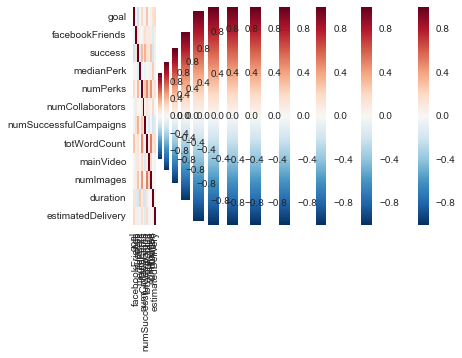

In [22]:
kc_dfs = [kc_film_video, kc_publishing, kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
title = ["Film & Video", "Publishing", "Design", "Art", "Food", "Fashion", "Games", "Theater", "Music", "Crafts", "Technology", "Comics"]
i=0
for df in kc_dfs:
    df.drop(["category"], axis=1)
    correlation_matrix = df.corr()
    heatmap = sns.heatmap(correlation_matrix).get_figure()
    heatmap_title = title[i]
    heatmap.savefig(heatmap_title + " Heatmap.png")
    i+=1

    

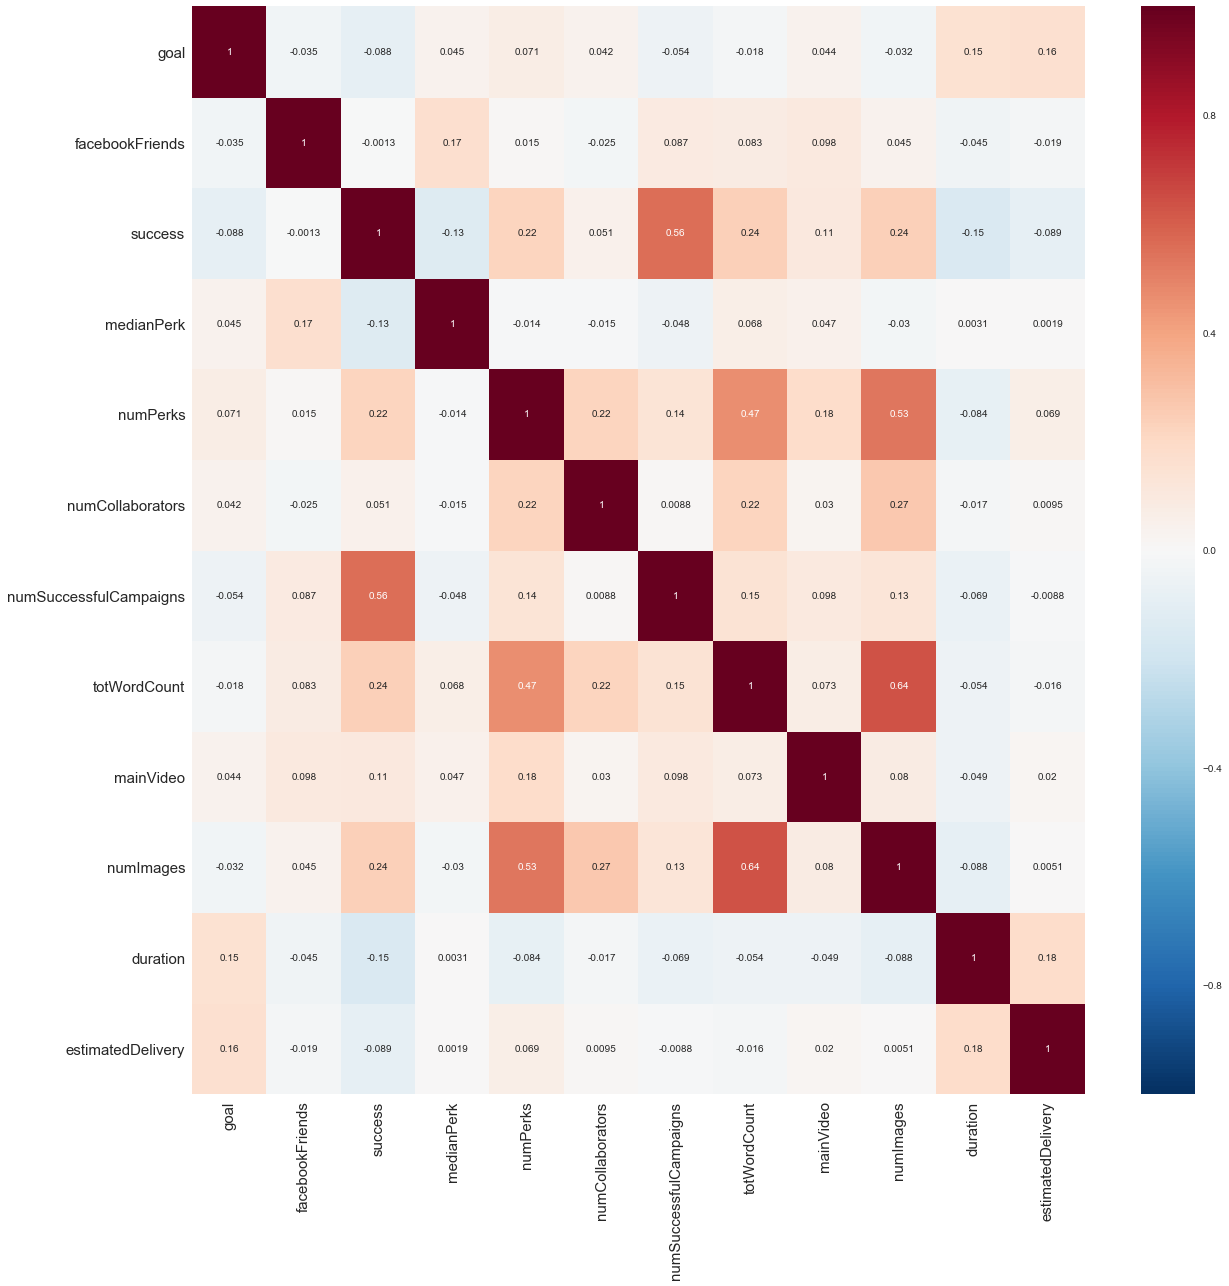

In [21]:
plt.figure(figsize=(20,20))

heatmap2 = sns.heatmap(kc_film_video.drop(["category"], axis=1).corr(),  annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap2.savefig("Film & Video Heatmap.png")

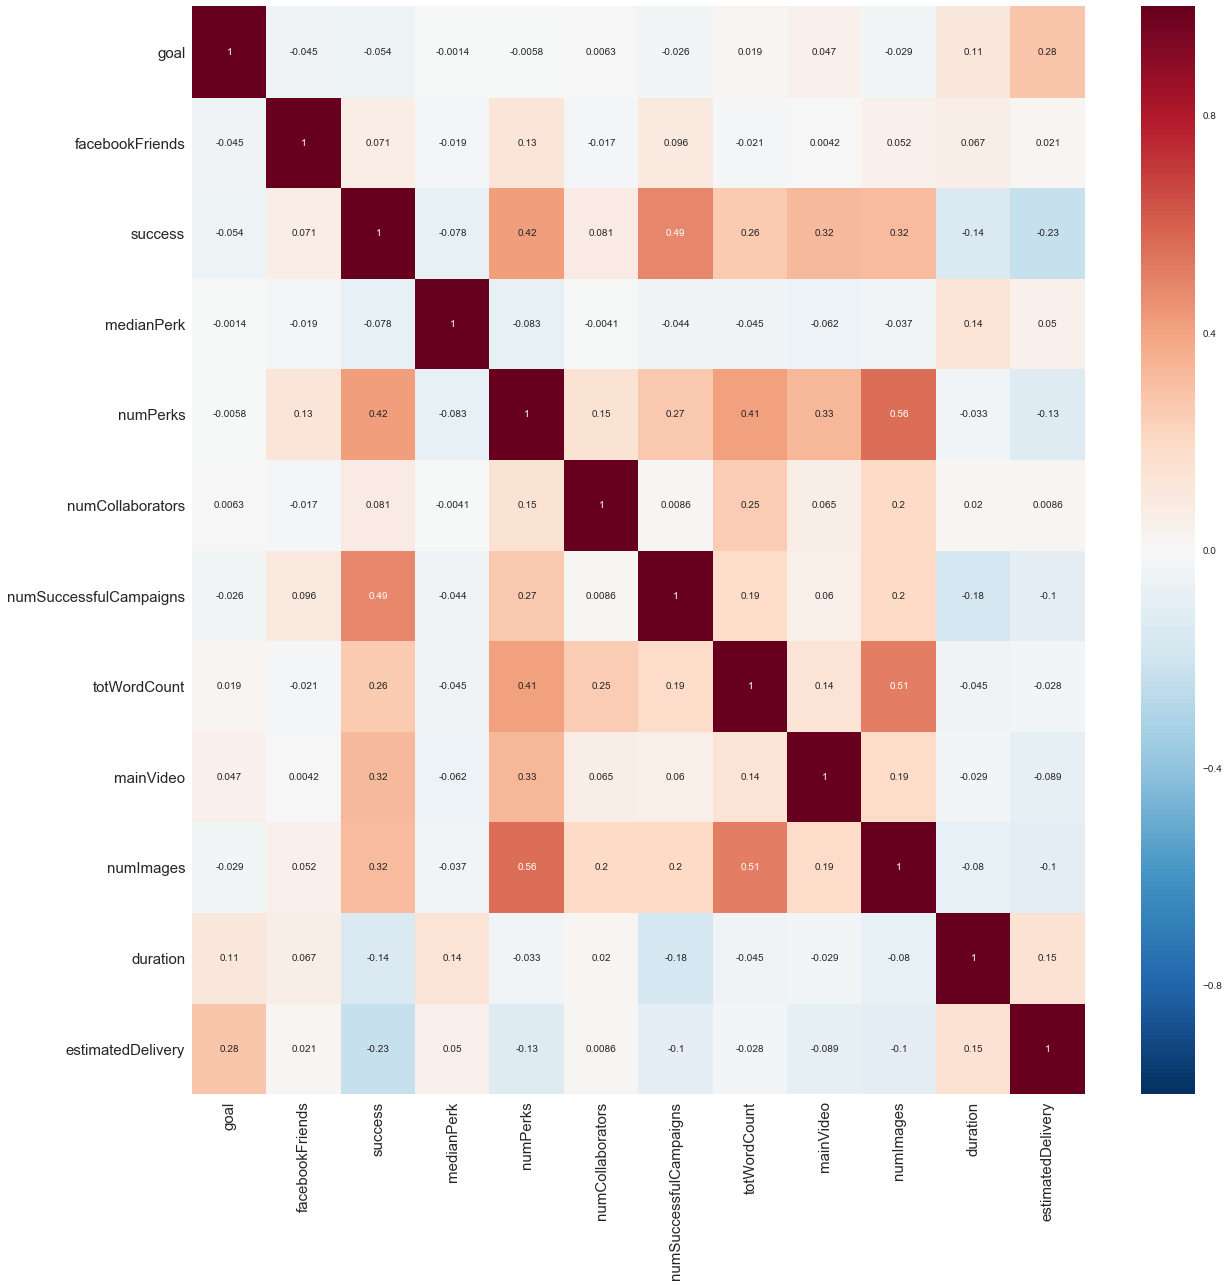

In [17]:
plt.figure(figsize=(20,20))

heatmap3 = sns.heatmap(kc_publishing.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap3.savefig("Publishing Heatmap.png")

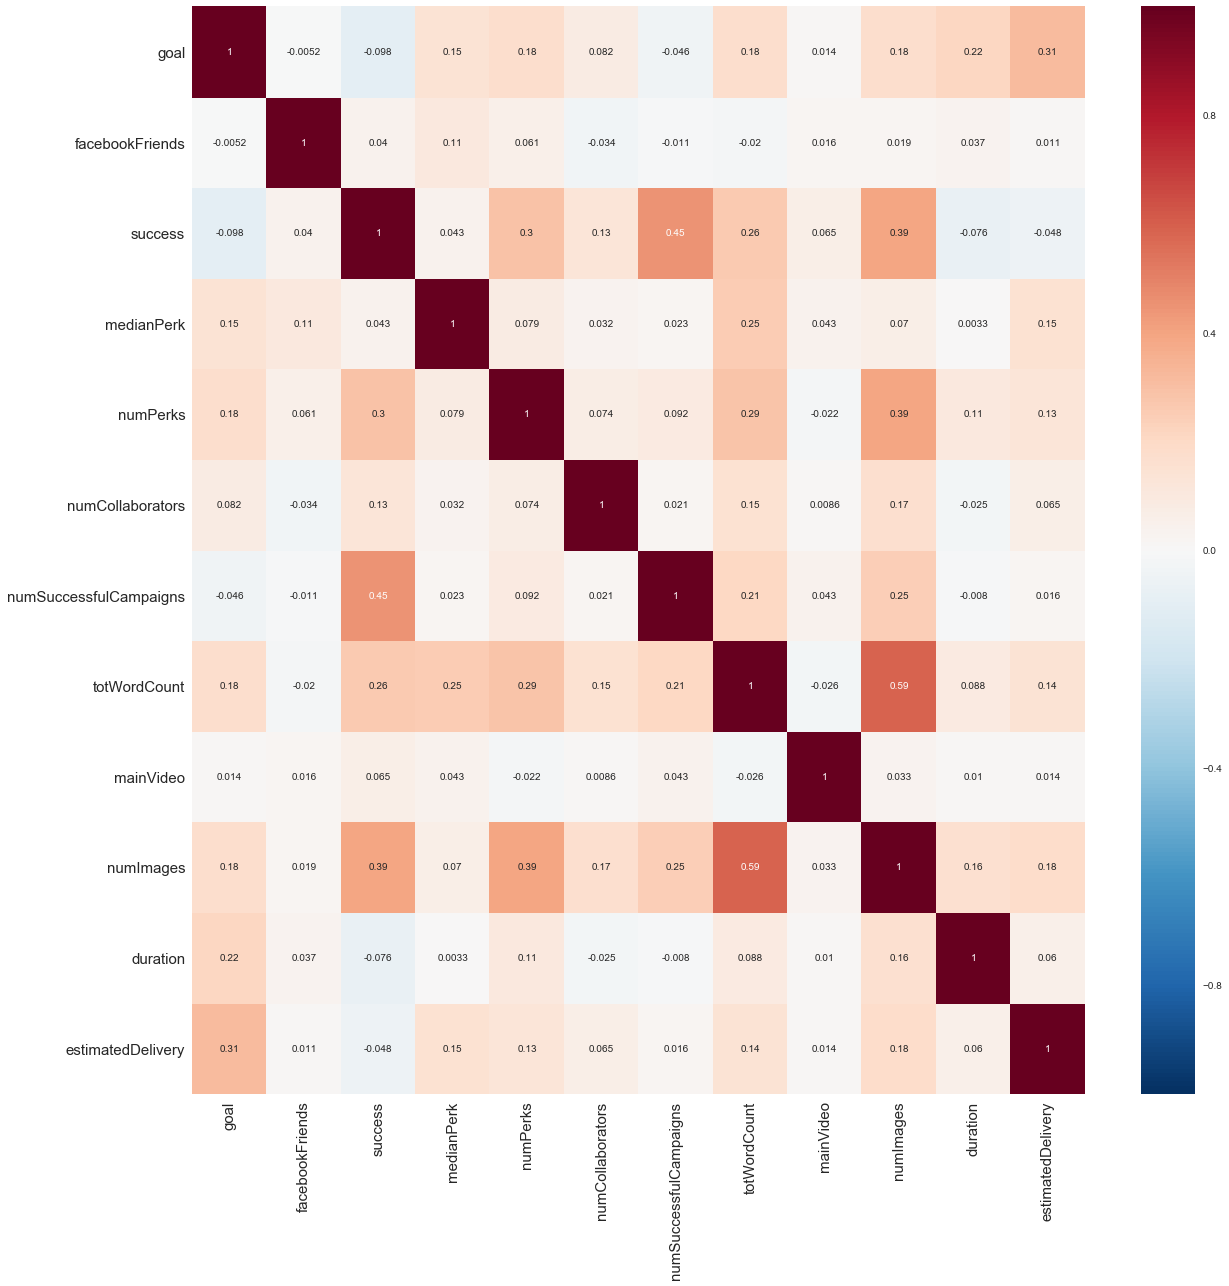

In [22]:
plt.figure(figsize=(20,20))

heatmap4 = sns.heatmap(kc_design.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap4.savefig("Design Heatmap.png")

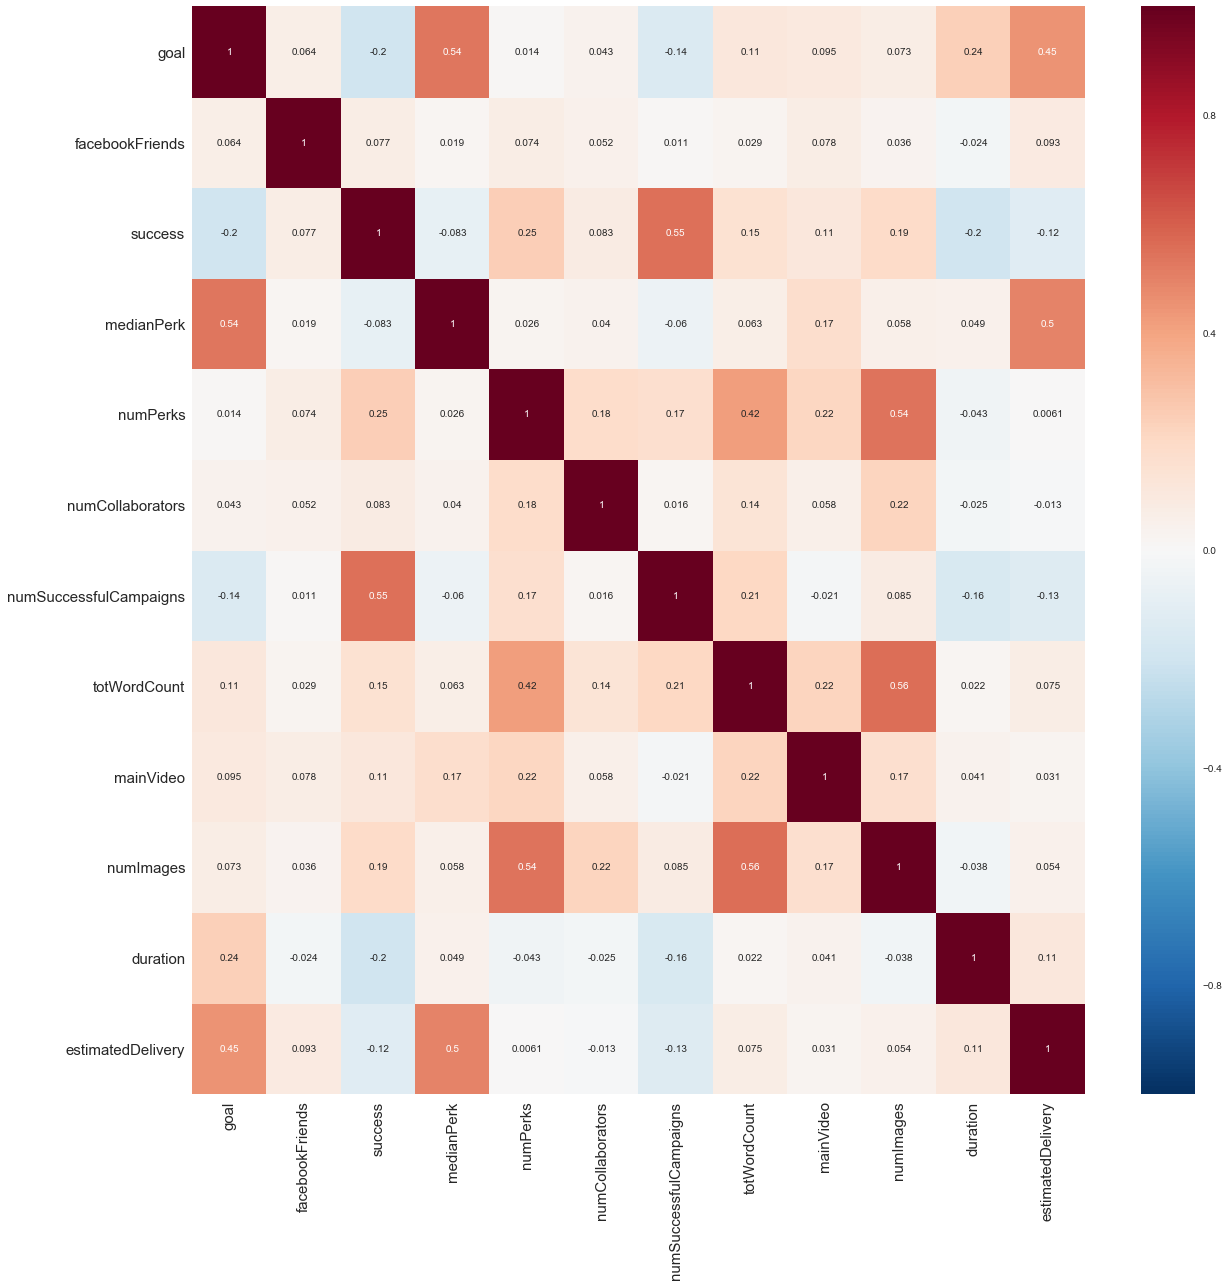

In [25]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap6 = sns.heatmap(kc_art.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap6.savefig("Art Heatmap.png")

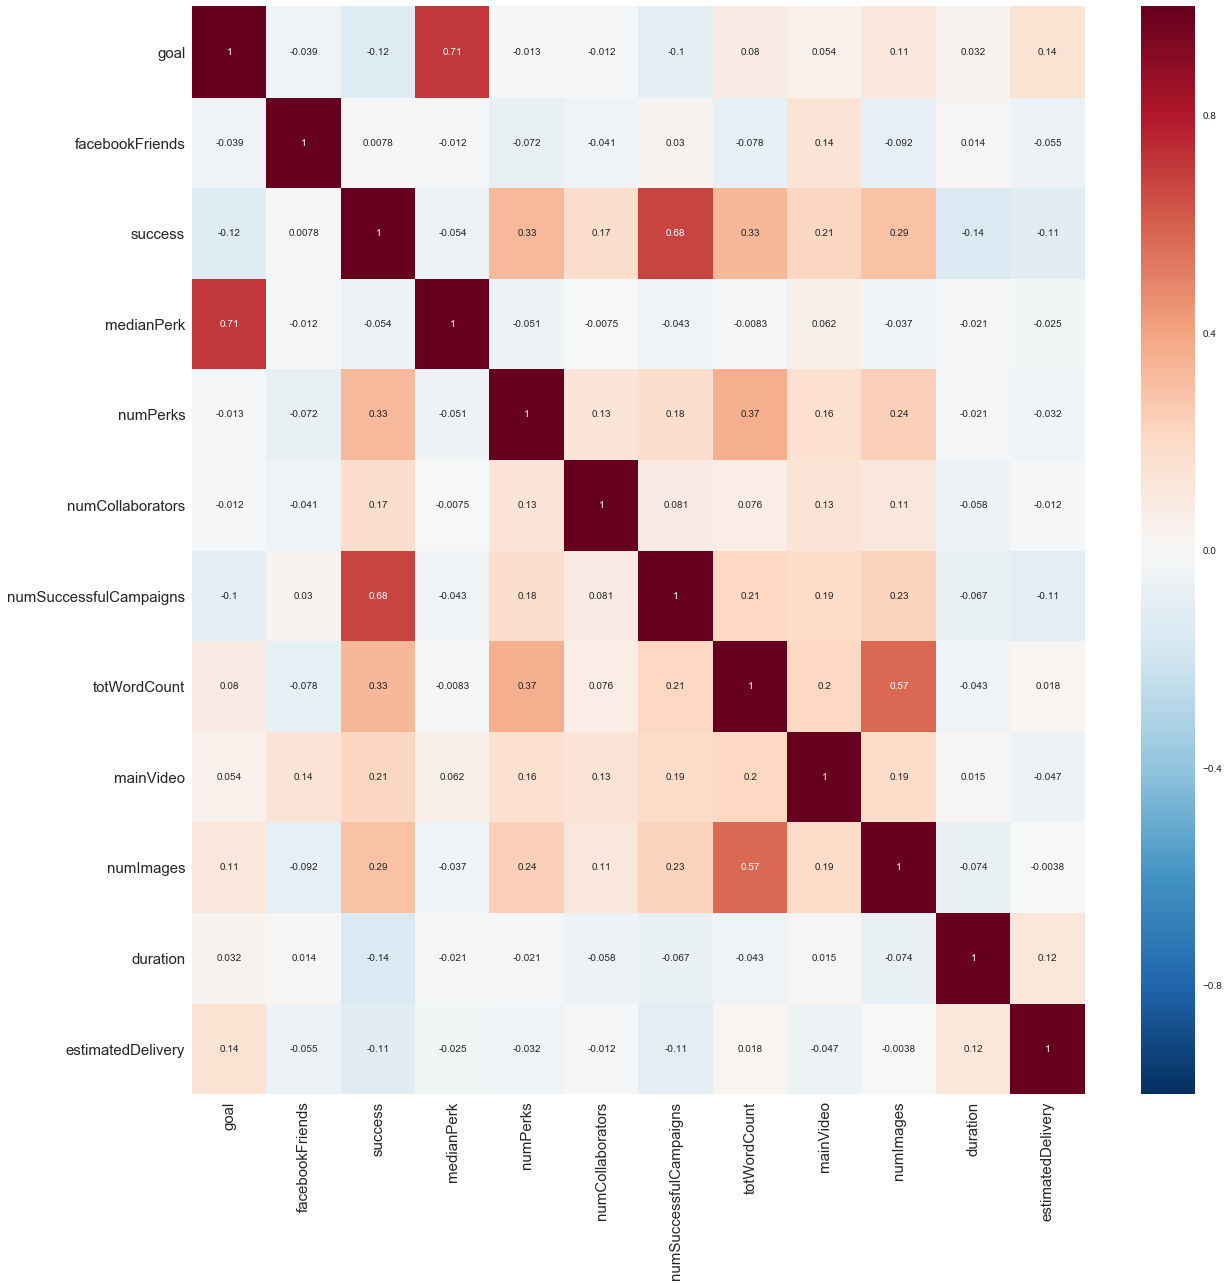

In [26]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap7 = sns.heatmap(kc_food.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap7.savefig("Food Heatmap.png")

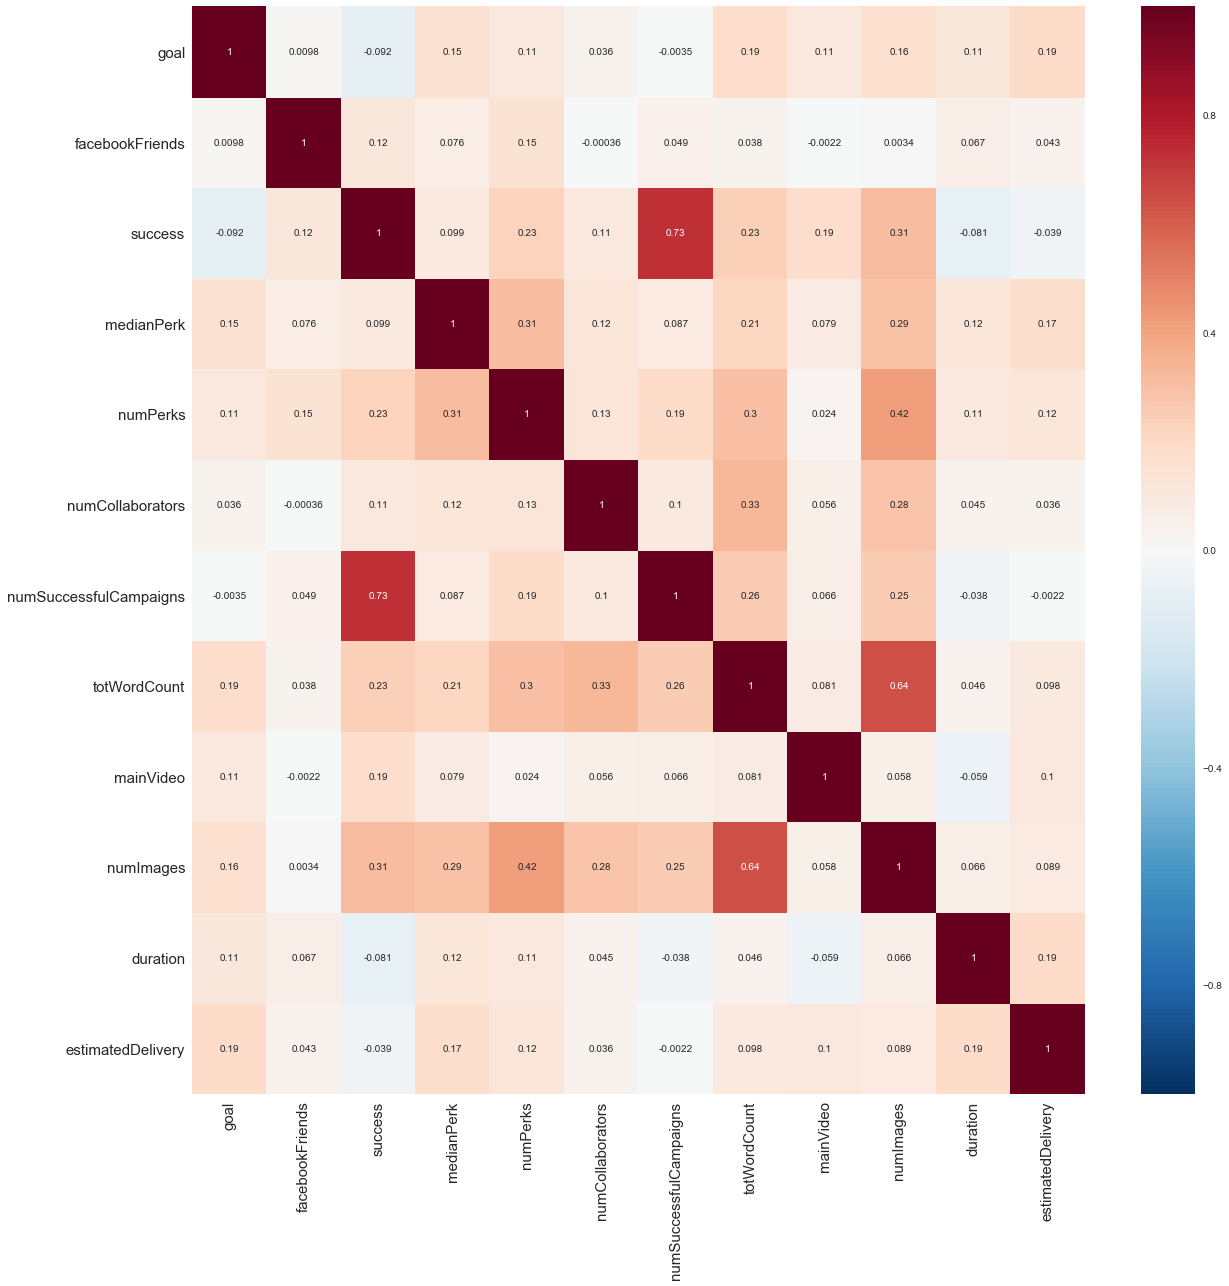

In [27]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_fashion.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Fashion Heatmap.png")

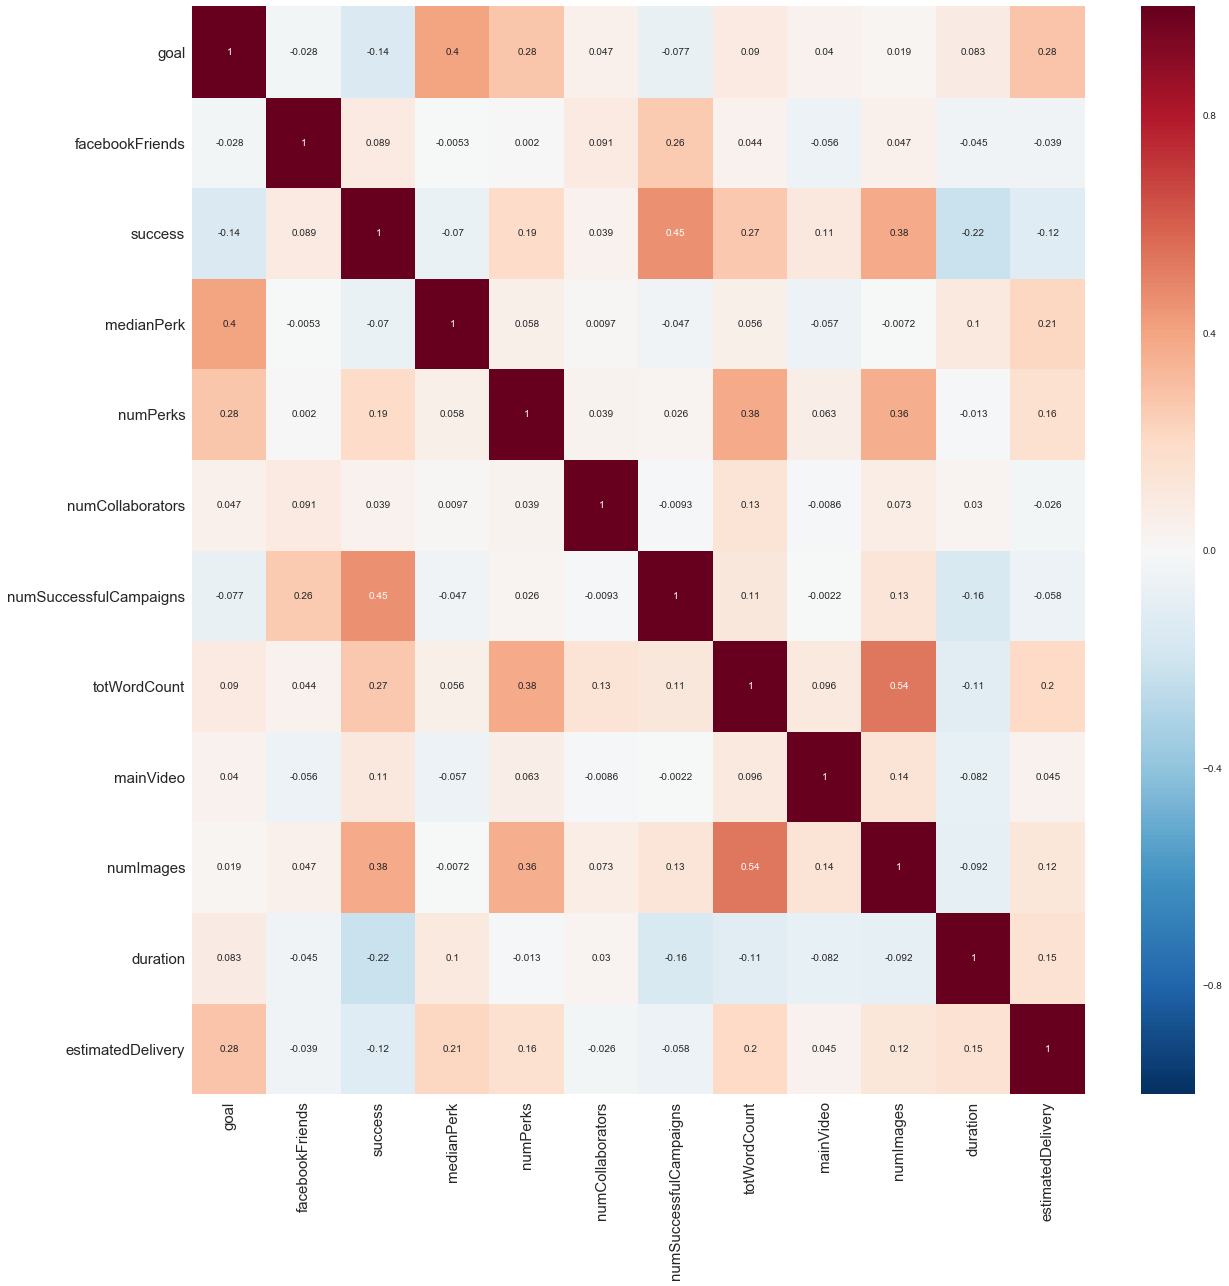

In [28]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_games.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Games Heatmap.png")


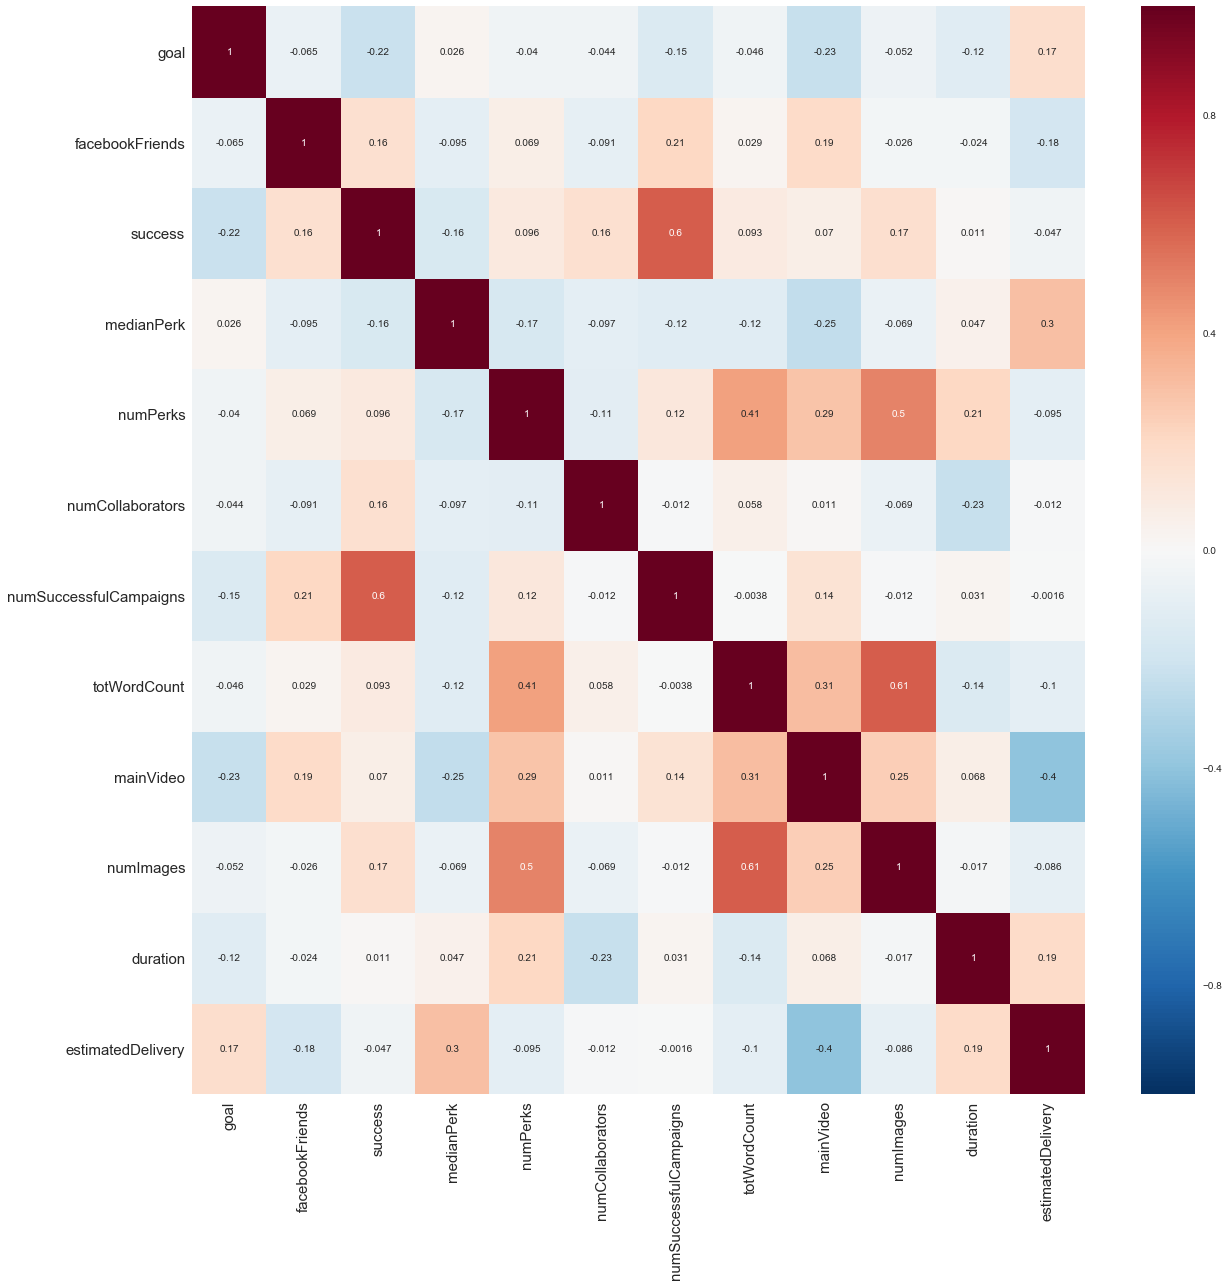

In [30]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_theater.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Theater Heatmap.png")

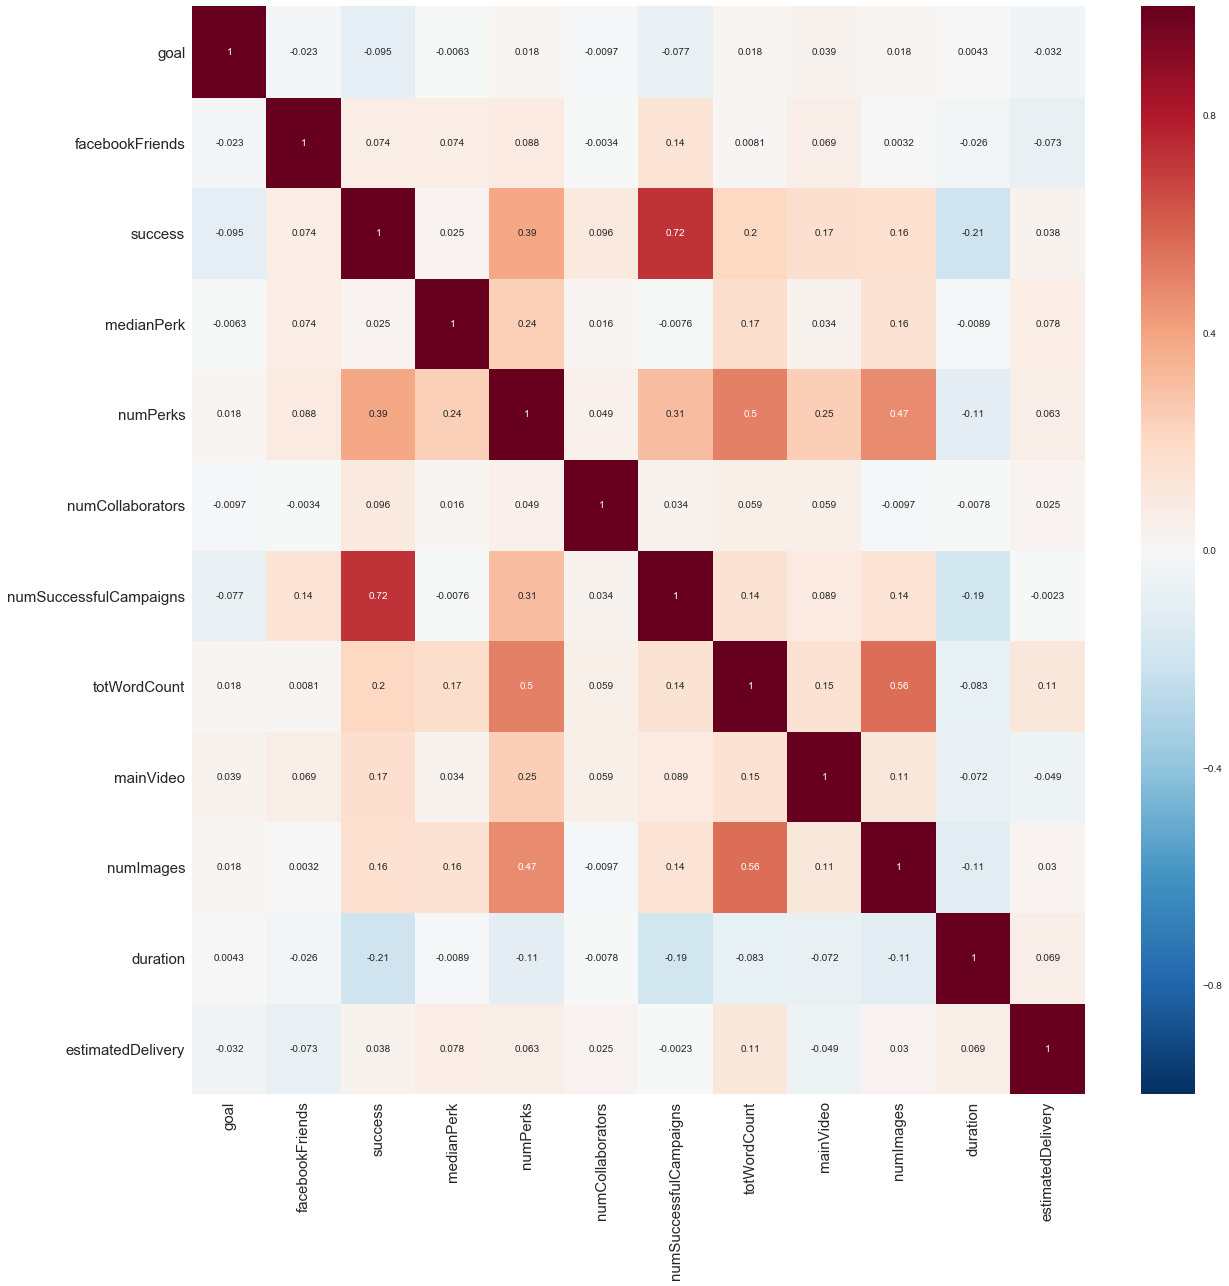

In [31]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_music.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Music Heatmap.png")

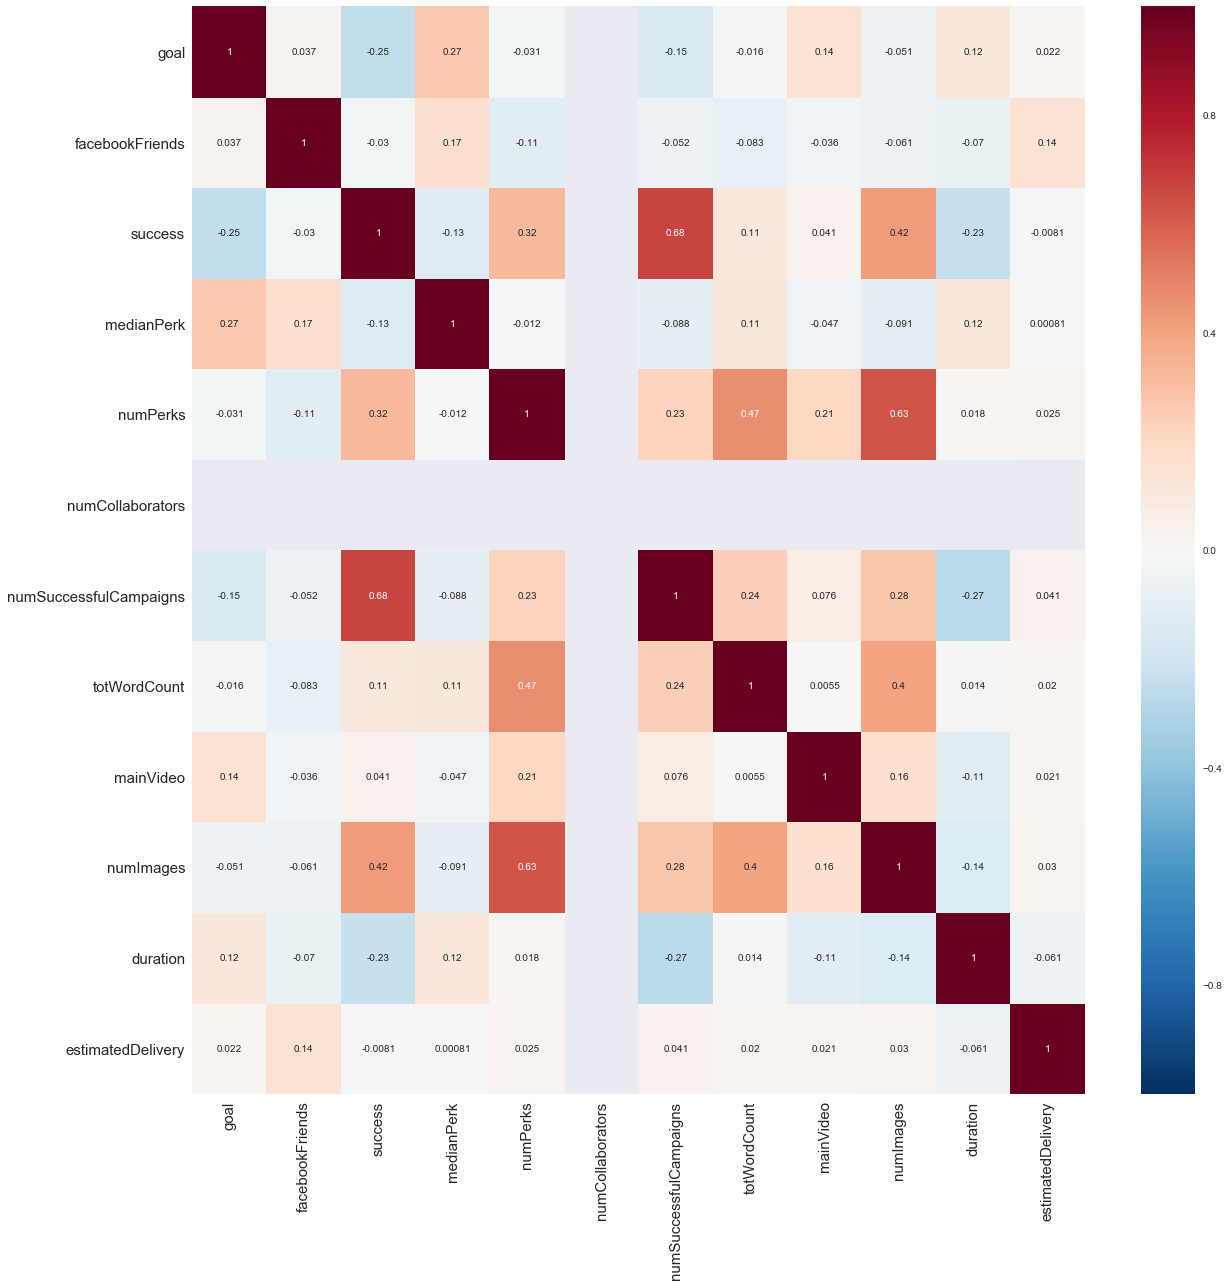

In [35]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_crafts.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Crafts Heatmap.png")

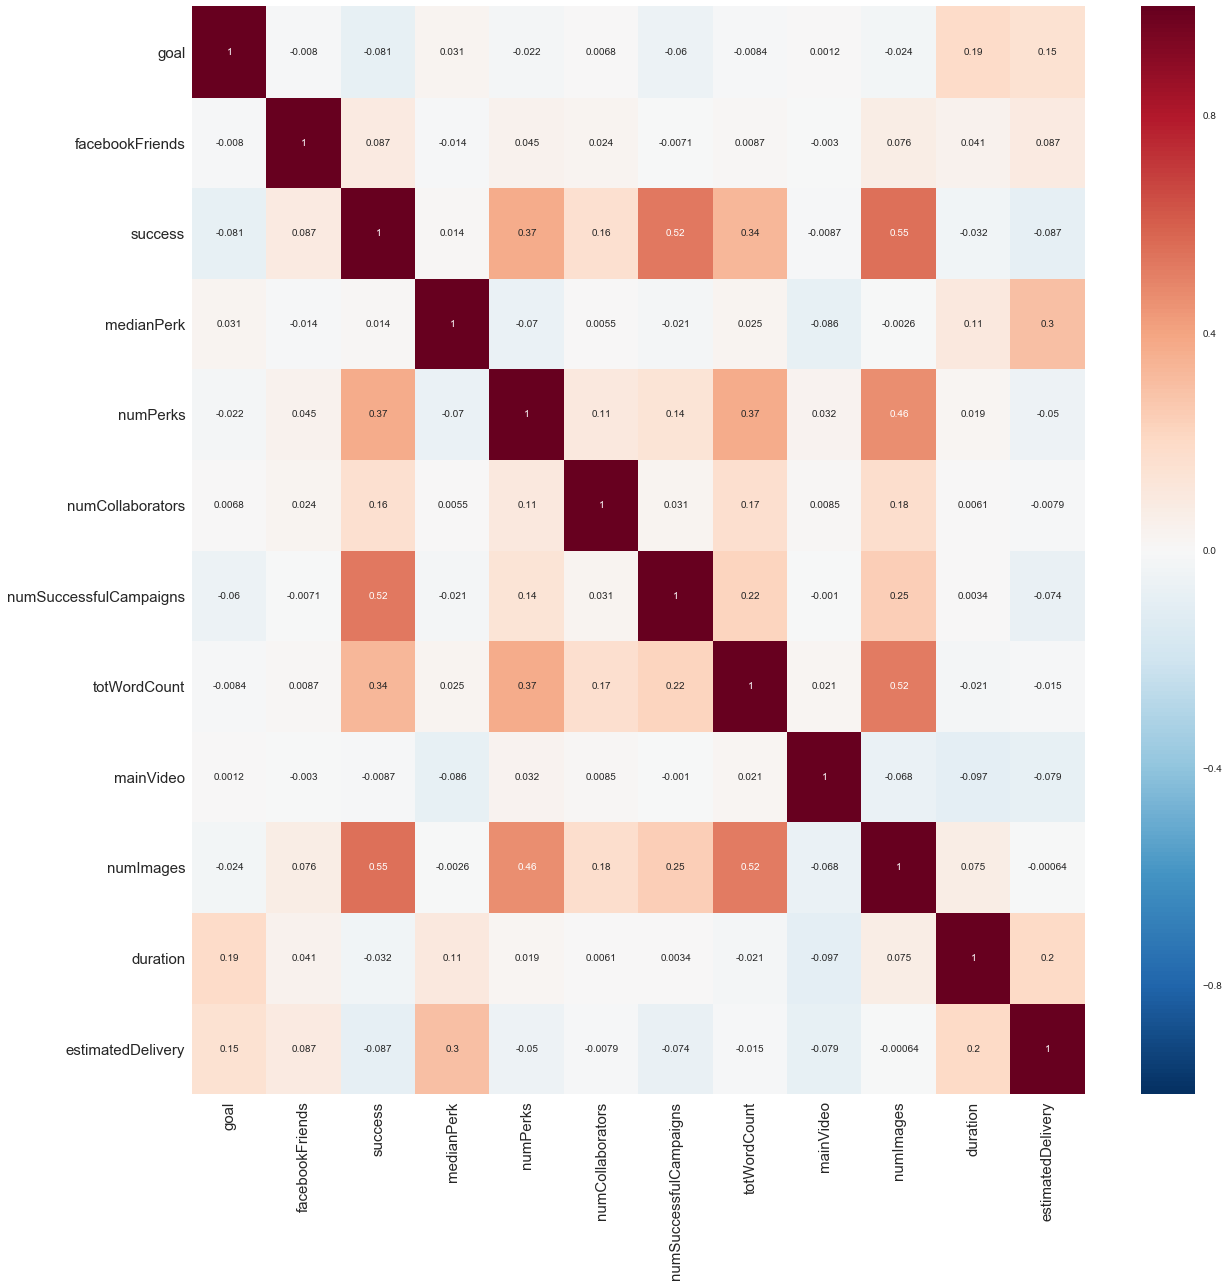

In [33]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_technology.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Technology Heatmap.png")

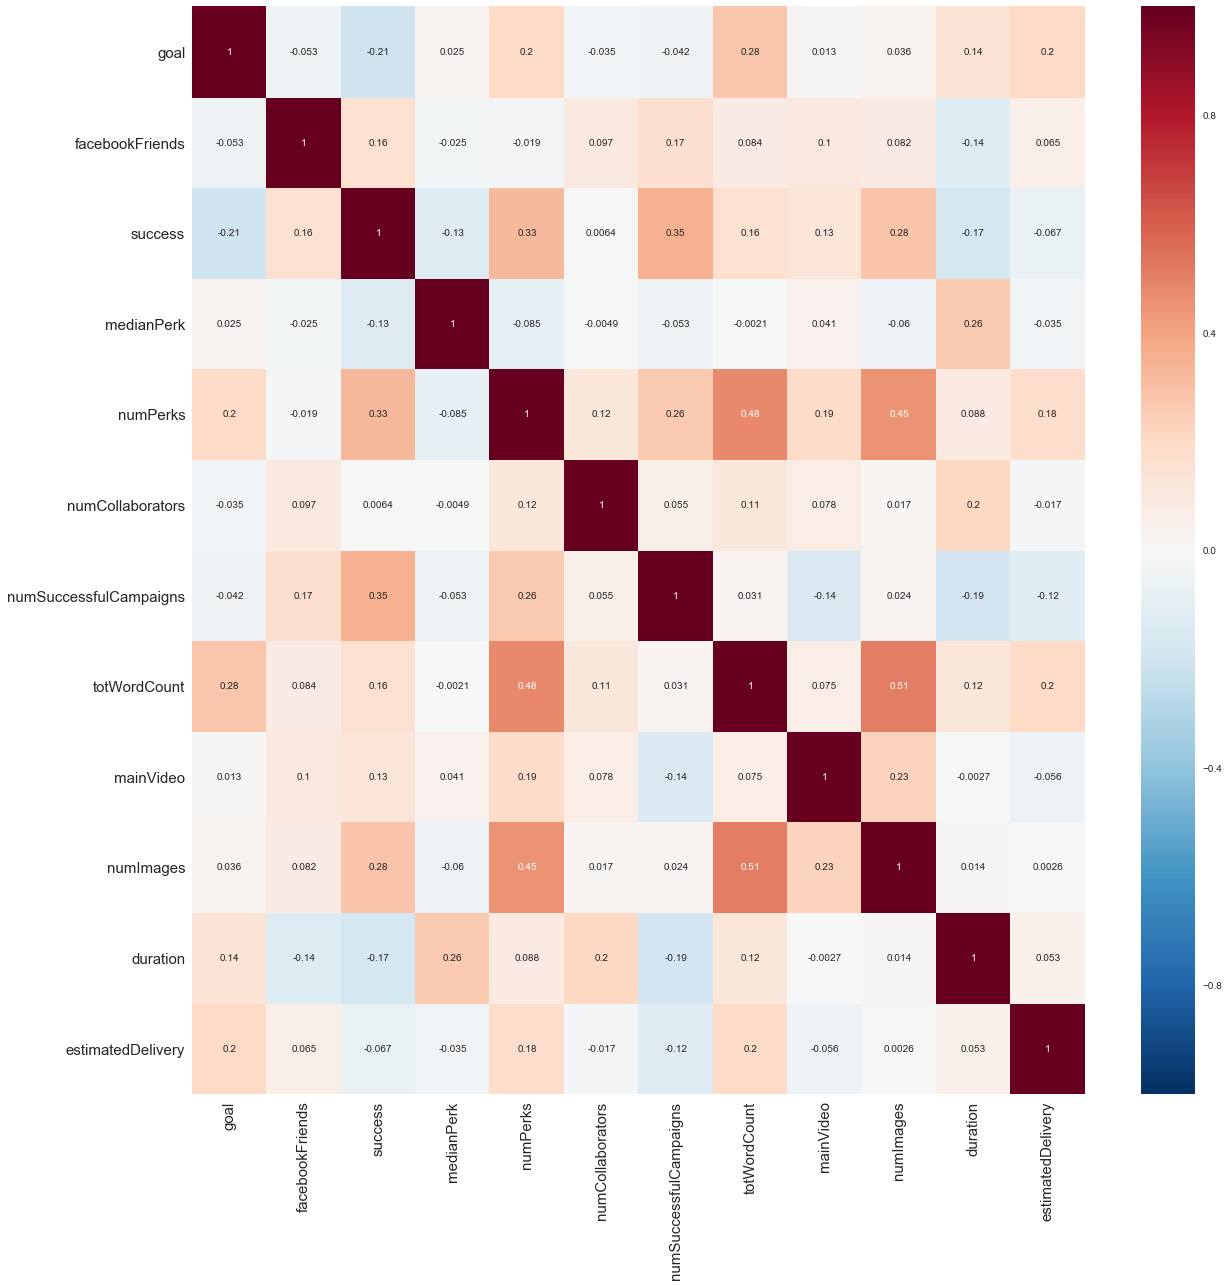

In [34]:
#kc_design, kc_art, kc_food, kc_fashion, kc_games, kc_theater, kc_music, kc_crafts, kc_technology, kc_comics]
plt.figure(figsize=(20,20))

heatmap8 = sns.heatmap(kc_comics.drop(["category"], axis=1).corr(), annot=True).get_figure()

plt.yticks(rotation=0, fontsize=15)
plt.xticks(rotation = 90, fontsize=15)
heatmap8.savefig("Comics Heatmap.png")